# <ins>Song Lyrics Through the Years</ins>

# Data Cleaning

- In this notebook, I look at the data I scraped from [Top 40 Weekly](https://top40weekly.com/) and [Genius](https://genius.com) in the previous [notebook](01_webscraping.ipynb).
- I check for and rectify duplicate (or near-duplicate) entries, NaN values, and songs that need to be rescraped.


## Table of contents

1. [Load packages and data](#Load-packages-and-data)
2. [Check for duplicates](#Check-for-duplicates)

    - [Drop duplicates](#Drop-duplicates)
    - [Scrape extra pages](#Scrape-extra-pages)
    - [Add titles](#Add-titles)
  
  
3. [Check for NaN values](#Check-for-NaN-values)
4. [Check for other bad scrapes](#Check-for-other-bad-scrapes)

    - [Finishing touches](#Finishing-touches)
    - [Save DataFrame](#💾-Save-DataFrame)
    
    
5. [Drop certain genres](#Drop-certain-genres)

    - [Save/Load trimmed DataFrame](#💾-Save/Load-trimmed-DataFrame)
    
    
6. [Next notebook: NLP, Feature Engineering, and EDA](#Next-notebook:-NLP,-Feature-Engineering,-and-EDA)

    
## Load packages and data

[[go back to the top](#Predicting-Poetic-Movements)]

In [1]:
# custom functions for webscraping
from functions.webscraping import *

# standard dataframe packages
import pandas as pd
import numpy as np

# graphing packages
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_style('ticks')

# timekeeping/progress packages
import time
from tqdm import tqdm

# saving/loading packages
import gzip
import pickle
import json

# reload functions/libraries when edited
%load_ext autoreload
%autoreload 2

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# increase column width of dataframe
pd.set_option('max_colwidth', 150)

In [2]:
# load data
with gzip.open('data/lyrics_df_updated.pkl', 'rb') as hello:
    df = pickle.load(hello)

In [3]:
df.head()

,year,title,artist,lyrics
0,1960,THE VILLAGE OF ST. BERNADETTE,Andy Williams,"I've traveled far, the land and the sea\nBeautiful places I happened to be\nOne little town I'll never forget\nIs Lourdes, the village of St. Bern..."
1,1960,IN MY LITTLE CORNER OF THE WORLD,Anita Bryant,"Oh, come along with me\nTo my little corner of the world\nAnd dream a little dream\nIn my little corner of the world\n\nTonight, my love\nWe'll sh..."
2,1960,PAPER ROSES,Anita Bryant,I realize the way your eyes deceived me\nWith tender looks that I mistook for love\nSo take away the flowers that you gave me\nAnd send the kind t...
3,1960,O DIO MIO,Annette,"E un giorno lui mi disse: ""Nei tuoi occhi vedo fame\nNon vedo rabbia, figlio, no\nMa voglia di lottare.""\nDivisi il cibo nel mio piatto col rivale..."
4,1960,WONDERLAND BY NIGHT,Bert Kaempfert,Stars hang suspended\nAbove a floating yellow moon\nTwo hearts were blended\nWhile angels sang a lover's tune\n\nAnd so we kissed\nNot knowing if ...


### More rescraping

In [4]:
# parse personal api keys
with open('data/api_keys.json', 'r') as json_file:
    creds = json.load(json_file)

# set the credentials based on the credentials file
client_id = creds['client_id']
client_secret = creds['client_secret']
access_token = creds['access_token']

In [5]:
df[df.title.str.startswith('FREAKY')]

,year,title,artist,lyrics
4686,2018,FREAKY FRIDAY,Lil Dicky featuring Chris Brown,"Lil Dicky, ooh\nMustard on the beat, ho\n\n\nChris Breezy olarak uyandım, aman Tanrım adamın hasıyım (hasiktir)\nAşırı havalıyım ve dans edebiliyo..."


In [6]:
# featuring rescrapes
df.loc[4691, 'lyrics'] = featuring(df, 4691, access_token)

In [7]:
# rescrape
df.loc[155, 'lyrics'] = lyrics_grabber(access_token, 'wooden heart joe')
df.loc[580, 'lyrics'] = lyrics_grabber(access_token, 'treat her right roy')
df.loc[917, 'lyrics'] = lyrics_grabber(access_token, 'love is blue paul')

df.loc[4024, 'lyrics'] = lyrics_grabber(access_token, 'deja vu beyonce')
df.loc[4043, 'lyrics'] = lyrics_grabber(access_token, 'fergalicious')
df.loc[4580, 'lyrics'] = lyrics_grabber(access_token, 'cheap thrills sia')
df.loc[4623, 'lyrics'] = lyrics_grabber(access_token, '1-800-273-8255')
df.loc[4686, 'lyrics'] = lyrics_grabber(access_token, 'freaky friday lil')

In [8]:
# remove lines
df.loc[71, 'lyrics'] = remove_n_lines(df.loc[71, 'lyrics'], 0, end_n=1)
df.loc[165, 'lyrics'] = remove_n_lines(df.loc[165, 'lyrics'], 4)
df.loc[782, 'lyrics'] = remove_n_lines(df.loc[782, 'lyrics'], 1)
df.loc[846, 'lyrics'] = remove_n_lines(df.loc[846, 'lyrics'], 6)

In [9]:
# instrumentals
df.loc[5, 'lyrics'] = np.nan

In [10]:
# remove brackets and words contained within
df['lyrics'] = df.lyrics.map(remove_brackets)

## Create decade column (target value)

In [11]:
# create column with decade label
df['decade'] = df.year.map(lambda x: f'{str(x//10)}0s')

# just for my own edification, i'll reorder the columns
df = df[['year', 'decade', 'title', 'artist', 'lyrics']]

# take a look
df.tail()

,year,decade,title,artist,lyrics
4752,2019,2010s,YOU NEED TO CALM DOWN,Taylor Swift,"You are somebody that I don't know\nBut you're takin' shots at me like it's Patrón\nAnd I'm just like, damn, it's 7 AM\nSay it in the street, that..."
4753,2019,2010s,ME!,Taylor Swift featuring Brendon Urie,"I promise that you'll never find another like me\n\n\nI know that I'm a handful, baby, uh\nI know I never think before I jump\nAnd you're the kind..."
4754,2019,2010s,HEARTLESS,The Weeknd,"Young Metro, young Metro, young Metro (Sheesh)\nAyy (Ayy)\nYoung Metro, young Metro\n\n\nNever need a bitch, I'm what a bitch need (Bitch need)\nT..."
4755,2019,2010s,DANCE MONKEY,Tones and I,"They say, ""Oh my God, I see the way you shine\nTake your hands, my dear, and place them both in mine""\nYou know you stopped me dead while I was pa..."
4756,2019,2010s,HIGHEST IN THE ROOM,Travis Scott,I got room in my fumes (Yeah)\nShe fill my mind up with ideas\nI'm the highest in the room (It’s lit)\nHope I make it outta here (Let's go)\n\n\nS...


## Drop NaNs

- Most (if not all) NaN values should be for songs without lyrics, i.e. instrumental songs.
- First, I'll take a look at how many instrumental songs made it into the Top 10 by year.

In [12]:
# songs without lyrics
instrumentals = df[df.lyrics.isnull()]

# take a look
instrumentals.head()

,year,decade,title,artist,lyrics
5,1960,1960s,WHITE SILVER SANDS,Bill Black’s Combo,NaN
38,1960,1960s,EXODUS,Ferrante and Teicher,NaN
39,1960,1960s,THEME FROM “THE APARTMENT”,Ferrante and Teicher,NaN
81,1960,1960s,THE THEME FROM “A SUMMER PLACE”,Percy Faith and His Orchestra,NaN
102,1960,1960s,WALK–DON’T RUN,The Ventures,NaN


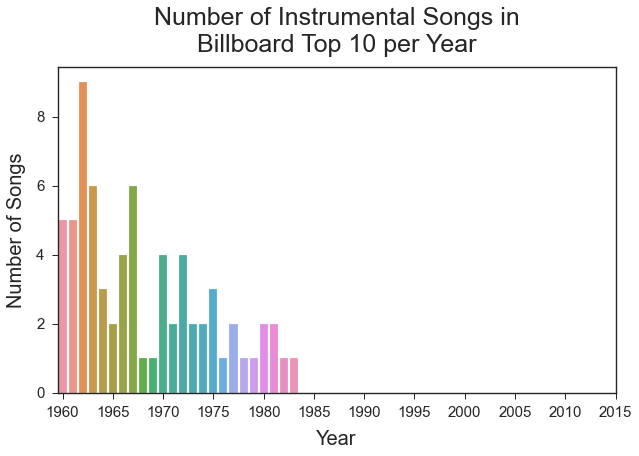

In [13]:
# graph number of instrumental songs per year
plt.figure(figsize=(10,6))
sns.barplot(x=instrumentals.year.value_counts().sort_index().index, y=instrumentals.year.value_counts().sort_index())
plt.title('Number of Instrumental Songs in\nBillboard Top 10 per Year', fontsize=25, pad=15)
plt.xlabel('Year', fontsize=20, labelpad=10)
plt.ylabel('Number of Songs', fontsize=20, labelpad=10)
plt.xticks(ticks=range(0,60,5), labels=range(1960,2021,5), fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [14]:
df[df.lyrics.isnull()]

,year,decade,title,artist,lyrics
5,1960,1960s,WHITE SILVER SANDS,Bill Black’s Combo,NaN
38,1960,1960s,EXODUS,Ferrante and Teicher,NaN
39,1960,1960s,THEME FROM “THE APARTMENT”,Ferrante and Teicher,NaN
81,1960,1960s,THE THEME FROM “A SUMMER PLACE”,Percy Faith and His Orchestra,NaN
102,1960,1960s,WALK–DON’T RUN,The Ventures,NaN
...,...,...,...,...,...
2265,1982,1980s,CHARIOTS OF FIRE – TITLES,Vangelis,NaN
2480,1985,1980s,AXEL F,Harold Faltermeyer,NaN
2485,1985,1980s,MIAMI VICE THEME,Jan Hammer,NaN
2716,1987,1980s,SONGBIRD,Kenny G,NaN


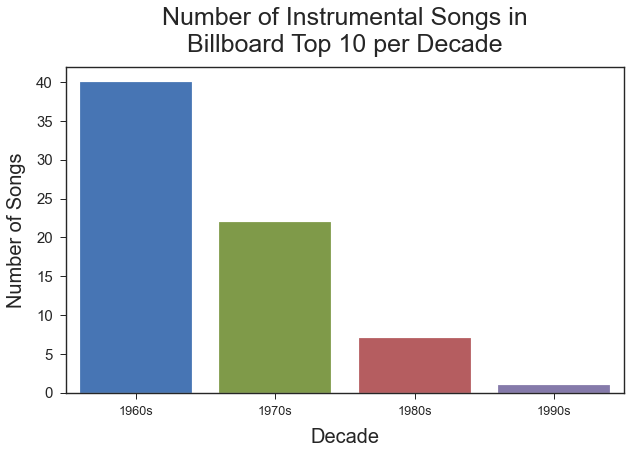

In [15]:
# graph number of instrumental songs per year
plt.figure(figsize=(10,6))
sns.barplot(x=instrumentals.decade.value_counts().sort_index().index, y=instrumentals.decade.value_counts().sort_index())
plt.title('Number of Instrumental Songs in\nBillboard Top 10 per Decade', fontsize=25, pad=15)
plt.xlabel('Decade', fontsize=20, labelpad=10)
plt.ylabel('Number of Songs', fontsize=20, labelpad=10)
# plt.xticks(ticks=range(0,60,5), labels=range(1960,2021,5), fontsize=15)
plt.yticks(fontsize=15)
plt.show()

- The 1960s had a lot of instrumentals make it into the Top 10. This noticeably fell in the 1970s, then continued to decline into the 1980s, the decade in which instrumentals made their last appearance.
- Now, I'll go ahead and drop these rows.

In [16]:
# drop instrumentals and reset index
df_update = df.dropna().reset_index(drop=True)

## Create list of lines



In [17]:
# create column with list of lines, removing any empty strings
df_update['lyrics_lined'] = df_update.lyrics.map(lambda x: [line for line in x.split('\n') if line])

# take a look
df_update.head()

,year,decade,title,artist,lyrics,lyrics_lined
0,1960,1960s,THE VILLAGE OF ST. BERNADETTE,Andy Williams,"I've traveled far, the land and the sea\nBeautiful places I happened to be\nOne little town I'll never forget\nIs Lourdes, the village of St. Bern...","[I've traveled far, the land and the sea, Beautiful places I happened to be, One little town I'll never forget, Is Lourdes, the village of St. Ber..."
1,1960,1960s,IN MY LITTLE CORNER OF THE WORLD,Anita Bryant,"Oh, come along with me\nTo my little corner of the world\nAnd dream a little dream\nIn my little corner of the world\n\nTonight, my love\nWe'll sh...","[Oh, come along with me, To my little corner of the world, And dream a little dream, In my little corner of the world, Tonight, my love, We'll sha..."
2,1960,1960s,PAPER ROSES,Anita Bryant,I realize the way your eyes deceived me\nWith tender looks that I mistook for love\nSo take away the flowers that you gave me\nAnd send the kind t...,"[I realize the way your eyes deceived me, With tender looks that I mistook for love, So take away the flowers that you gave me, And send the kind ..."
3,1960,1960s,O DIO MIO,Annette,"E un giorno lui mi disse: ""Nei tuoi occhi vedo fame\nNon vedo rabbia, figlio, no\nMa voglia di lottare.""\nDivisi il cibo nel mio piatto col rivale...","[E un giorno lui mi disse: ""Nei tuoi occhi vedo fame, Non vedo rabbia, figlio, no, Ma voglia di lottare."", Divisi il cibo nel mio piatto col rival..."
4,1960,1960s,WONDERLAND BY NIGHT,Bert Kaempfert,Stars hang suspended\nAbove a floating yellow moon\nTwo hearts were blended\nWhile angels sang a lover's tune\n\nAnd so we kissed\nNot knowing if ...,"[Stars hang suspended, Above a floating yellow moon, Two hearts were blended, While angels sang a lover's tune, And so we kissed, Not knowing if o..."


### Save/Load

In [18]:
# uncomment to save
with gzip.open('data/lyrics_df_clean.pkl', 'wb') as goodbye:
    pickle.dump(df_update, goodbye, protocol=pickle.HIGHEST_PROTOCOL)
    
# # uncomment to load
# with gzip.open('data/lyrics_df_clean.pkl', 'rb') as hello:
#     df_update = pickle.load(hello)

In [19]:
df_update[df_update.lyrics.str.contains(':')]

,year,decade,title,artist,lyrics,lyrics_lined
3,1960,1960s,O DIO MIO,Annette,"E un giorno lui mi disse: ""Nei tuoi occhi vedo fame\nNon vedo rabbia, figlio, no\nMa voglia di lottare.""\nDivisi il cibo nel mio piatto col rivale...","[E un giorno lui mi disse: ""Nei tuoi occhi vedo fame, Non vedo rabbia, figlio, no, Ma voglia di lottare."", Divisi il cibo nel mio piatto col rival..."
32,1960,1960s,ARE YOU LONESOME TO-NIGHT,Elvis Presley,Are you lonesome tonight?\nDo you miss me tonight?\nAre you sorry we drifted apart?\nDoes your memory stray\nTo a bright sunny day\nWhen I kissed ...,"[Are you lonesome tonight?, Do you miss me tonight?, Are you sorry we drifted apart?, Does your memory stray, To a bright sunny day, When I kissed..."
117,1961,1960s,GEE WHIZ (Look At His Eyes),Carla Thomas,"Gee whiz, look at his eyes\nGee whiz, how they hypnotize\nHe's got everything a girl could want\nMan, oh, man, what a prize, ooh, ooh!\n\nGee whiz...","[Gee whiz, look at his eyes, Gee whiz, how they hypnotize, He's got everything a girl could want, Man, oh, man, what a prize, ooh, ooh!, Gee whiz,..."
119,1961,1960s,LET’S TWIST AGAIN,Chubby Checker,"Come on everybody!\nClap your hands!\nAw, you're looking good!\nI'm gonna sing my song\nIt won't take long!\nWe're gonna do the twist\nAnd it goes...","[Come on everybody!, Clap your hands!, Aw, you're looking good!, I'm gonna sing my song, It won't take long!, We're gonna do the twist, And it goe..."
149,1961,1960s,PEPPERMINT TWIST (Part 1),Joey Dee and the Starliters,Got a new dance and it goes like this:\n(Hupp di da pep-pep-pep-pep-pep)\nThe Name of this dance is the Peppermint Twist:\n(Hupp di da pep-pep-pep...,"[Got a new dance and it goes like this:, (Hupp di da pep-pep-pep-pep-pep), The Name of this dance is the Peppermint Twist:, (Hupp di da pep-pep-pe..."
...,...,...,...,...,...,...
4609,2018,2010s,I LOVE IT,Kanye West & Lil Pump,"'Cause you know in the old days\nThey couldn't say the shit they wanted to say\nThey had to fake orgasms and shit\nWe can tell niggas today:\n""Hey...","['Cause you know in the old days, They couldn't say the shit they wanted to say, They had to fake orgasms and shit, We can tell niggas today:, ""He..."
4616,2018,2010s,FREAKY FRIDAY,Lil Dicky featuring Chris Brown,"Lil Dicky, ooh\nMustard on the beat, ho\n\n\nI woke up Chris Breezy, oh my god I'm the man (oh shit)\nI’m so fly and I can dance (whoa, whoa shit)...","[Lil Dicky, ooh, Mustard on the beat, ho, I woke up Chris Breezy, oh my god I'm the man (oh shit), I’m so fly and I can dance (whoa, whoa shit), T..."
4620,2018,2010s,DON’T CRY,Lil Wayne featuring XXXTENTACION,"Yeah\nC5\n\n\nDon't cry, don’t go\nWon't lie, I fuckin' love you, whoa!\n\n\nWhy y’all staring into the clouds\nAm I rising or they comin' down?\n...","[Yeah, C5, Don't cry, don’t go, Won't lie, I fuckin' love you, whoa!, Why y’all staring into the clouds, Am I rising or they comin' down?, I see d..."
4621,2018,2010s,GIRLS LIKE YOU,Maroon 5 featuring Cardi B,"Spent 24 hours, I need more hours with you\nYou spent the weekend getting even, ooh\nWe spent the late nights making things right between us\n\n\n...","[Spent 24 hours, I need more hours with you, You spent the weekend getting even, ooh, We spent the late nights making things right between us, But..."


In [29]:
def colon_killer(song):
    lines = song.split('\n')
    for i, line in enumerate(lines):
        if ':' in line:
            temp = line.split(':')
            temp_words = temp[0].split()
            if len(temp_words) < 3:
                lines[i] = temp[1]
            else:
                lines[i] = ' '.join(temp_words[:-2]) + temp[1]
    return '\n'.join(lines)

In [21]:
please break code

SyntaxError: invalid syntax (<ipython-input-21-b8306b2d38fe>, line 1)

In [26]:
df_update.loc[3, 'lyrics'].split('\n')[0]

'E un giorno lui mi disse: "Nei tuoi occhi vedo fame'

In [28]:
df_update.loc[3, 'lyrics'].split('\n')[0].split(':')[0].split()

['E', 'un', 'giorno', 'lui', 'mi', 'disse']

In [30]:
print(colon_killer(df_update.loc[3, 'lyrics']))

E un giorno lui "Nei tuoi occhi vedo fame
Non vedo rabbia, figlio, no
Ma voglia di lottare."
Divisi il cibo nel mio piatto col rivale
Per fare in modo, sì, che ci potessimo sfamare
La vera forza di un uomo, sì, sta nel perdonare
Se vuoi battere il male allora insegnali ad amare


Fiero di essere tuo figlio
Grazie mamma del tuo amore
Non mi tocca il loro odio, no
Perché sono superiore
Ho mangiato le loro briciole
Un re difende chi è più debole
La famiglia accanto, fanculo i tuoi soldi
Muoio per la squadra come fossi Totti


Fiero di essere tuo figlio
Grazie mamma del tuo amore
Non mi tocca il loro odio, no
Perché sono superiore
Ho mangiato le loro briciole
Un re difende chi è più debole
La famiglia accanto, non mi fanno i soldi
Muoio per la squadra come fossi Totti


Dico solo grazie a me, mmh già
Dico solo grazie a mamma, potessi ti regalerei una stella
Facevi tre lavori insieme e mi hai tirata su da sola
Mio padre non ci stava ma oggi so che lui mi ama, oh
All'uscita di scuola per me,

In [23]:
print(df_update.loc[3, 'lyrics'])

E un giorno lui mi disse: "Nei tuoi occhi vedo fame
Non vedo rabbia, figlio, no
Ma voglia di lottare."
Divisi il cibo nel mio piatto col rivale
Per fare in modo, sì, che ci potessimo sfamare
La vera forza di un uomo, sì, sta nel perdonare
Se vuoi battere il male allora insegnali ad amare


Fiero di essere tuo figlio
Grazie mamma del tuo amore
Non mi tocca il loro odio, no
Perché sono superiore
Ho mangiato le loro briciole
Un re difende chi è più debole
La famiglia accanto, fanculo i tuoi soldi
Muoio per la squadra come fossi Totti


Fiero di essere tuo figlio
Grazie mamma del tuo amore
Non mi tocca il loro odio, no
Perché sono superiore
Ho mangiato le loro briciole
Un re difende chi è più debole
La famiglia accanto, non mi fanno i soldi
Muoio per la squadra come fossi Totti


Dico solo grazie a me, mmh già
Dico solo grazie a mamma, potessi ti regalerei una stella
Facevi tre lavori insieme e mi hai tirata su da sola
Mio padre non ci stava ma oggi so che lui mi ama, oh
All'uscita di scuo

In [ ]:

df_update.loc[148, 'lyrics_lined']

- Remove lines ending with colon?
- Remove lines with "spoken:"? Maybe just remove "spoken:", strip, and take it from there.
- Remove parentheses?
- Remove colon and the word(s) preceding it? (generally someones name or spoken)